In [1]:
# 开户时间：2017-01-01——2017-05-31
# 全量数据人数：246901
# 开单人数：2790

import pandas as pd 
from pandas import DataFrame
import json
import time
from datetime import date
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
sns.set_style('whitegrid')
import sys
reload(sys)
sys.setdefaultencoding('utf8') 

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# sns.axes_style()，可以看到是否成功设定字体为微软雅黑。


Populating the interactive namespace from numpy and matplotlib


##概率名单
select t1.user_name as user_name, t1.userid as userid, t1.firm_id as firm_id,  t1.partner_id as partner_id, t2.highvaluepro as  highvaluepro
from(
    select distinct user_name, userid, firm_id,  'pmec' as partner_id
    from silver_ep.tb_silver_account_v
    where (insert_time >= '2017-01-01' and insert_time <= '2017-05-31') and (partner_id = 'pmec')) t1
left join(
    select distinct urs as user_name,pmec_highvaluepro as highvaluepro
    from mining_ep.tb_feature
)t2 on t1.user_name = t2.user_name

union

select t1.user_name as user_name, t1.userid as userid, t1.firm_id as firm_id,  t1.partner_id as partner_id, t2.highvaluepro as  highvaluepro
from(
    select distinct user_name, userid, firm_id,  'hht' as partner_id
    from silver_ep.tb_silver_account_v
    where (insert_time >= '2017-01-01' and insert_time <= '2017-05-31') and (partner_id = 'hht')) t1
left join(
    select distinct urs as user_name,hht_highvaluepro as highvaluepro
    from mining_ep.tb_feature
)t2 on t1.user_name = t2.user_name

##最高历史净入金
select aa.user_name as user_name, max(aa.cum_amountin) as history_most 
from( 
	--历史累计金额
	select t4.user_name as user_name, t4.userid as userid, 
	   t4.realdate as realdate, t4.inorout as inorout, t4.inoutmoney as inoutmoney,
       sum(if(t4.inorout='A',t4.inoutmoney,-t4.inoutmoney)) over (partition by t4.user_name order by t4.realdate) as cum_amountin  
	from(
        select t1.user_name as user_name, t1.userid as userid,
               t3.realdate as realdate, t3.inorout as inorout, t3.inoutmoney as inoutmoney 
        from (-- 获得开户用户在pmec的firm_id等
            select distinct user_name, userid, firm_id, partner_id
            from silver_ep.tb_silver_account_v
            where (insert_time >= '2017-01-01' and insert_time <= '2017-05-31') and (partner_id = 'pmec'))t1  
        left join(
             select firm_id,realdate, inorout, inoutmoney    
             from silver_ep.history_transfer_v 
             where partnerid ='pmec'
        )t3 on t1.firm_id = t3.firm_id 

        union
	
        -- 获得开户用户在hht的入金情况
        select t1.user_name as user_name, t1.userid as userid,
               t3.realdate as realdate, t3.inorout as inorout, t3.inoutmoney as inoutmoney
        from (
            --用户开户表silver_ep.tb_silver_account_v,获得开户用户在hht的firm_id
             select distinct user_name, userid, firm_id,  partner_id
            from silver_ep.tb_silver_account_v
            where (insert_time >= '2017-01-01' and insert_time <= '2017-05-31') and (partner_id = 'hht')) t1 
        left join(
             select firm_id,realdate, inorout, inoutmoney    
             from silver_ep.history_transfer_v 
             where partnerid ='hht'
        )t3 on t1.firm_id = t3.firm_id 
 	)t4
)aa
group by aa.user_name 

##自然入金
select aa.user_name as user_name, aa.inorout as inorout, sum(aa.inoutmoney) as inoutmoney
from
(--pmec的第一通有效电话时间，与第一通有效电话前的入金情况
select t1.user_name as user_name, t1.userid as userid, 
       t3.create_time as create_time,
       t4.realdate as realdate, t4.inorout as inorout, t4.inoutmoney as inoutmoney
from(
	-- 用户开户预测概率表,得到pmec的firm_id
	select distinct user_name, userid, firm_id, partner_id
    from silver_ep.tb_silver_account_v
    where (insert_time >= '2017-01-01' and insert_time <= '2017-05-31') and (partner_id = 'pmec'))t1
left join(
	-- 客户关系管理表
	select crm_user_id, user_id
	from silver_ep.tb_crm_user_v
)t2 on t1.userid = t2.user_id
left join(
	-- 投顾给某一用户拨打电话的最早时间
	select t.crm_user_id as crm_user_id, min(t.create_time) as create_time
	from (
	select crm_user_id,create_time,worksec
	from silver_ep.tb_crm_tel_record_v
	where crm_user_id is not null and crm_user_id <> -1 and worksec > 30
	order by crm_user_id, create_time asc)t
	group by t.crm_user_id
)t3 on t2.crm_user_id = t3.crm_user_id
left join(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
		-- 用户出入金情况表
		select firm_id, inorout, inoutmoney, realdate
		from silver_ep.history_transfer_v
		where partnerid = 'pmec'
)t4 on t1.firm_id = t4.firm_id 
where (t3.create_time > t4.realdate or t3.create_time is null)

union
--hht的第一通有效电话时间，与第一通有效电话前的入金情况
select t1.user_name as user_name, t1.userid as userid, 
       t3.create_time as create_time,
       t4.realdate as realdate, t4.inorout as inorout, t4.inoutmoney as inoutmoney
from(
	-- 用户开户预测概率表,得到hht的firm_id
       select distinct user_name, userid, firm_id,  partner_id
        from silver_ep.tb_silver_account_v
        where (insert_time >= '2017-01-01' and insert_time <= '2017-05-31') and (partner_id = 'hht'))t1
left join(
	-- 客户关系管理表
	select crm_user_id, user_id
	from silver_ep.tb_crm_user_v
)t2 on t1.userid = t2.user_id
left join(
	-- 投顾给某一用户拨打电话的最早时间
	select t.crm_user_id as crm_user_id, min(t.create_time) as create_time
	from (
	select crm_user_id,create_time,worksec
	from silver_ep.tb_crm_tel_record_v
	where crm_user_id is not null and crm_user_id <> -1 and worksec > 30
	order by crm_user_id, create_time asc)t
	group by t.crm_user_id
)t3 on t2.crm_user_id = t3.crm_user_id
left join(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
		-- hht用户出入金情况表
		select firm_id, inorout, inoutmoney, realdate
		from silver_ep.history_transfer_v
		where partnerid = 'hht'
)t4 on t1.firm_id = t4.firm_id 
where (t3.create_time > t4.realdate or t3.create_time is null)
) aa
group by aa.user_name,aa.inorout

In [2]:
## 开户时预测的用户开户概率
infile= 'firstmodel_prob20170101_20170531.csv'
prob_df = pd.read_csv(infile)
prob_df.columns = ['user_name',  'userid', 'firm_id','partner_id', 'highvaluepro']
print prob_df.user_name.is_unique

## 在两个交易所都开户的用户user_name: tmp1
tmp1 = prob_df.ix[prob_df.user_name.isin(prob_df.ix[prob_df.user_name.duplicated(), 'user_name'])] 
tmp1['highvaluepro'].fillna(0, inplace= True)

In [3]:
tmp1.shape[0]/2.0

13835.0

In [4]:
# tmp2：在两个交易所开户且都预测的用户，其概率为两者的最大值
tmp2 = tmp1.groupby(['user_name', 'userid'])['highvaluepro'].max().reset_index()
#prob_df： 在两个交易所开户 与 只在一个交易所开户的用户
prob_df = pd.concat([tmp2, prob_df.ix[~prob_df.user_name.isin(tmp2.user_name), ['user_name', 'userid', 'highvaluepro']]], axis= 0) 

# 将预测开单概率从高到低排序
prob_df.sort_index(by= ['highvaluepro'], ascending= False, inplace= True)
print prob_df.user_name.is_unique
prob_df.shape

(258835, 3)

In [5]:
## history_most
history_most = pd.read_csv('history_most.csv')
df = pd.merge(prob_df, history_most[['user_name', 'history_most']], left_on= 'user_name', right_on= 'user_name', how= 'left')
df['history_most'].fillna(0, inplace= True)
df.shape

(258835, 4)

In [6]:
## 自然入金情况
infile = 'nature_inmoney.csv'
read_df = pd.read_csv(infile)
nature_inmoney = read_df[['user_name', 'inorout', 'inoutmoney']]
tmp_df = pd.merge(df, nature_inmoney.ix[nature_inmoney.inorout == 'A'], left_on= 'user_name', right_on= 'user_name', how= 'left')


tmp_df['inorout'] = tmp_df['inorout'].fillna('A') # 填充inorout缺失的情况
tmp_df['inoutmoney'].fillna(0, inplace= True)
df = tmp_df.ix[tmp_df.inorout == 'A']

In [7]:
## 打标签，最高历史净入金超过5w的是1
df['label'] = np.zeros((df.shape[0], 1))
mask = df.history_most >= 50000
df.ix[mask, 'label'] = 1
df.user_name.is_unique

True

In [8]:
## df是估计过开户概率的用户
df.ix[df.highvaluepro.isnull()].to_csv(r'没打标签的人.csv', index= False)
df = df.ix[df.highvaluepro.notnull()] # 有一部分人概率是null，去除

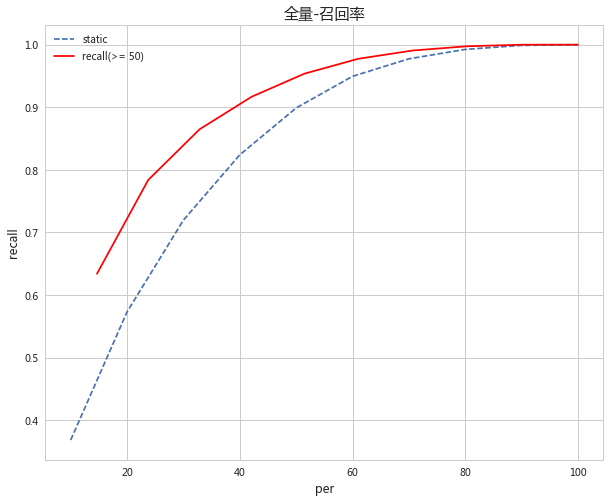

In [9]:
## 静态模型和召回模型的召回率曲线，很好用！！！！！
# 注：只要得到用户的开户概率，就可以用下面这段求召回率。开户概率可以是表mining_ep.tb_feature中，也可以是新模型预测出来的。
recall_static = []
new_per = []
recall = []

money= 50

for per in range(10, 110, 10):
    th = df.iloc[int(np.percentile(range(df.shape[0]),per)), 2]  # 注：‘2’是开户概率的列号，概率已从大到小排序
    print 'th:', th
    mask = df.highvaluepro >= th

    high_rec = df.ix[mask, 'label'].sum() / np.float(df['label'].sum())
    recall_static.append(high_rec)

    # 低价值用户中自然入金超过50的，召回为高价值用户

    new_per.append(per + 100 * df.ix[(~mask) & (df['inoutmoney'] >= money)].shape[0] / np.float(df.shape[0]))

    low_rec = df.ix[(~mask) & (df['inoutmoney'] >= money), 'label'].sum() / np.float(df['label'].sum())
    recall.append(high_rec + low_rec)

import matplotlib.pyplot as plt
import seaborn
fig = plt.figure(figsize= (10, 8))
plt.plot(range(10, 110, 10), recall_static, '--')
plt.plot(new_per, recall, 'r')

plt.title('全量-召回率', {'fontsize': 15})
plt.legend(['static', 'recall(>= 50)'])
plt.xlabel('per', {'fontsize': 12})
plt.ylabel('recall', {'fontsize': 12})
plt.savefig(r'C:\Users\bjwangwenhui\Desktop\results\recall.jpg')
plt.show()

In [10]:
#### 《召回率》表格中的数据
per = 26.9
th = df.iloc[int(np.percentile(range(df.shape[0]),per)), 2]
print 'th:', th  # 概率阈值

mask = df.highvaluepro >= th

print 'high value customers number:', mask.sum()  # 高价值用户数

high_rec = df.ix[mask, 'label'].sum() / np.float(df['label'].sum())
print 'high value kaidan people number:', df.ix[mask, 'label'].sum()  # 高价值中开单的人数
print 'high_rec:', high_rec   # 静态模型的召回率

# 低价值用户中自然入金超过50的，召回为高价值用户

money = 50
print 'new_per', per + df.ix[(~mask) & (df['inoutmoney'] >= money)].shape[0] / np.float(df.shape[0]) * 100  # 考虑自然入金后，总的高价值人数占比
print 'consider add people number:', df.ix[(~mask) & (df['inoutmoney'] >= money)].shape[0]   # 考虑自然入金后，增加的高价值人数

low_rec = df.ix[(~mask) & (df['inoutmoney'] >= money), 'label'].sum() / np.float(df['label'].sum())

print 'consider add kaidan people number:', df.ix[(~mask) & (df['inoutmoney'] >= money), 'label'].sum() # 考虑自然入金后，增加的开单人数
print 'new_rec:', high_rec + low_rec # 新的召回率

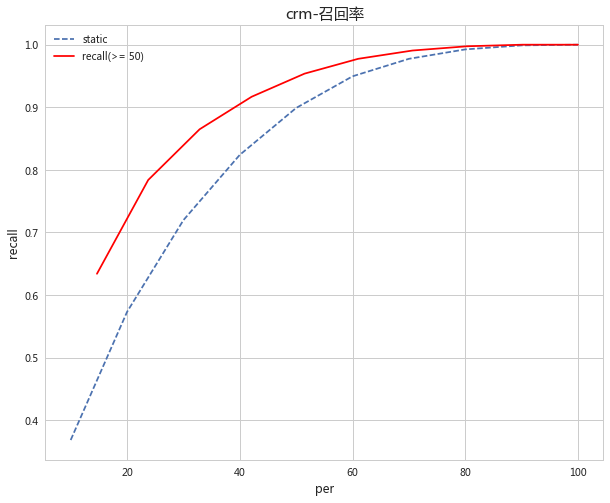

In [12]:
### 考虑进入crm系统的用户的召回率
crm_user = pd.read_csv('crm_user_name.csv')  # 这张表只有一列，silver_ep.tb_crm_user_v全部用户的user_name
crm_df = pd.merge(df, crm_user, left_on= 'user_name', right_on= 'user_name', how= 'inner') # 关联
## 静态模型的召回率
recall_static = []
new_per = []
recall = []

money= 50

for per in range(10, 110, 10):
    th = df.iloc[int(np.percentile(range(df.shape[0]),per)), 2]
    print 'th:', th
    mask = df.highvaluepro >= th

    high_rec = df.ix[mask, 'label'].sum() / np.float(df['label'].sum())
    recall_static.append(high_rec)

    # 低价值用户中自然入金超过50的，召回为高价值用户

    new_per.append(per + 100 * df.ix[(~mask) & (df['inoutmoney'] >= money)].shape[0] / np.float(df.shape[0]))

    low_rec = df.ix[(~mask) & (df['inoutmoney'] >= money), 'label'].sum() / np.float(df['label'].sum())
    recall.append(high_rec + low_rec)
    
import matplotlib.pyplot as plt
import seaborn
fig = plt.figure(figsize= (10, 8))
plt.plot(range(10, 110, 10), recall_static, '--')
plt.plot(new_per, recall, 'r')

plt.title('crm-召回率', {'fontsize': 15})
plt.legend(['static', 'recall(>= 50)'])
plt.xlabel('per', {'fontsize': 12})
plt.ylabel('recall', {'fontsize': 12})
plt.savefig(r'C:\Users\bjwangwenhui\Desktop\results\crm_recall.jpg')
plt.show()

In [13]:
# ### 考虑进入crm系统的用户的召回率，《召回率》表格中的值
# per = 26.9  # 概率排名占比
# th = df.iloc[int(np.percentile(range(df.shape[0]),per)), 2] # 阈值
# print 'th:', th

# mask = df.highvaluepro >= th

# print 'high value customers number:', mask.sum()

# high_rec = df.ix[mask, 'label'].sum() / np.float(df['label'].sum())
# print 'high value kaidan people number:', df.ix[mask, 'label'].sum()
# print 'high_rec:', high_rec

# # 低价值用户中自然入金超过50的，召回为高价值用户

# money = 50
# print 'new_per', per + df.ix[(~mask) & (df['inoutmoney'] >= money)].shape[0] / np.float(df.shape[0]) * 100
# print 'consider add people number:', df.ix[(~mask) & (df['inoutmoney'] >= money)].shape[0]

# low_rec = df.ix[(~mask) & (df['inoutmoney'] >= money), 'label'].sum() / np.float(df['label'].sum())

# print 'consider add kaidan people number:', df.ix[(~mask) & (df['inoutmoney'] >= money), 'label'].sum()
# print 'new_rec:', high_rec + low_rec